<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/Easy_Network_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - First Fully connected network with Keras

Author: Umberto Michelucci (umberto.michelucci@toelt.ai)

## Exercises

### Exercise 1:
Try to increase the network size (increasing the number of layers and number of neurons) and see if you get better results.

### Exercise 2:
Try to reduce the network size to just one neuron. What kind of neuron do you need to use (activation function, output, etc.) to classify the images? And what results do you get?

### Exercise 3:
Check for overfitting. Is the network overfitting? Can you tell?

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

import matplotlib.pyplot as plt

2024-01-16 16:06:30.351877: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-16 16:06:30.463735: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 16:06:30.463872: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 16:06:30.509551: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 16:06:30.594153: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-16 16:06:30.594756: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Text(0.5, 1.0, 'Label is 9')

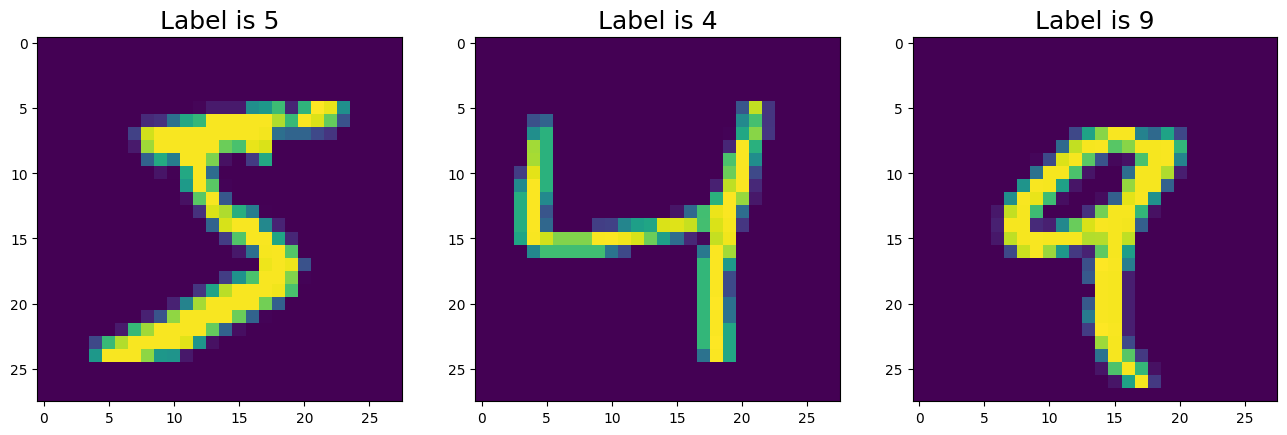

In [6]:
fig = plt.figure(figsize = (16,5))
fig.add_subplot(1,3,1)
plt.imshow(x_train[0])
plt.title("Label is "+ str(y_train[0]), fontsize = 18)
fig.add_subplot(1,3,2)
plt.imshow(x_train[2])
plt.title("Label is "+ str(y_train[2]), fontsize = 18)
fig.add_subplot(1,3,3)
plt.imshow(x_train[4])
plt.title("Label is "+ str(y_train[4]), fontsize = 18)

## Sequential model

In [51]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(11, activation='sigmoid'), #activation='relu'
  tf.keras.layers.Dense(8, activation='sigmoid'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=100, verbose=0) #bigger is the batch_size faster is
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.2888 - accuracy: 0.9220 - 490ms/epoch - 2ms/step


[0.28876036405563354, 0.921999990940094]

In [48]:
print(history.history)

{'loss': [1.910787582397461, 1.2486560344696045, 0.8935509920120239, 0.6937939524650574, 0.5714373588562012, 0.4921034872531891, 0.43707606196403503, 0.3988956809043884, 0.3699997663497925, 0.34937724471092224, 0.3328903317451477, 0.31955596804618835, 0.30937203764915466, 0.2997894883155823, 0.2917952239513397, 0.2847747802734375, 0.27758410573005676, 0.27161353826522827, 0.2659521996974945, 0.2611156105995178], 'accuracy': [0.5149000287055969, 0.7322499752044678, 0.8012166619300842, 0.8444499969482422, 0.8678833246231079, 0.881766676902771, 0.8908166885375977, 0.8981333374977112, 0.9034666419029236, 0.9075666666030884, 0.9110999703407288, 0.9140333533287048, 0.9157833456993103, 0.9180499911308289, 0.9201833605766296, 0.9223333597183228, 0.9232666492462158, 0.92535001039505, 0.9265999794006348, 0.9282000064849854], 'val_loss': [1.5043883323669434, 1.0170525312423706, 0.7600029706954956, 0.611534833908081, 0.52071213722229, 0.4586542844772339, 0.42012348771095276, 0.38985010981559753, 0

Let's check how the network is learning by plotting the loss function for the training and test datasets. This is a handy way to check if there is any overfitting or if the network is not learning properly.

### Learning Assessment

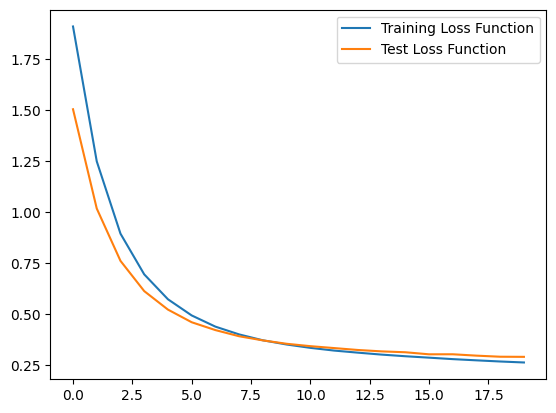

In [49]:
plt.plot(history.history['loss'], label = 'Training Loss Function')
plt.plot(history.history['val_loss'], label = 'Test Loss Function')
plt.legend()
plt.show()

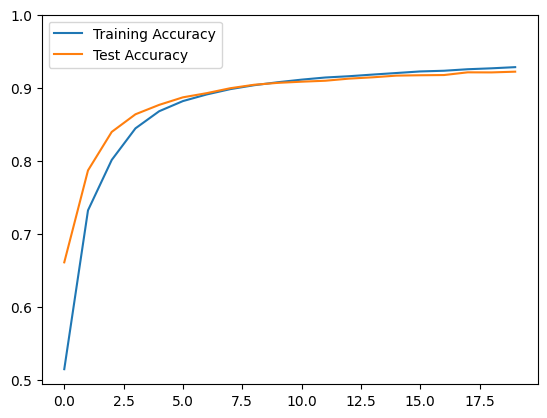

In [50]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.ylim(None, 1)
plt.legend()
plt.show()

### Prediction check

In [9]:
model.predict(x_train[0][np.newaxis,:])[0]

2023-11-03 10:23:11.796297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 250ms/step


array([2.0932854e-10, 1.2803095e-07, 3.7935425e-08, 1.0632555e-02,
       1.6675897e-13, 9.8936534e-01, 1.0461208e-11, 2.0593782e-10,
       3.7572550e-09, 1.9499737e-06], dtype=float32)

1/1 [==============================] - 0s 16ms/step


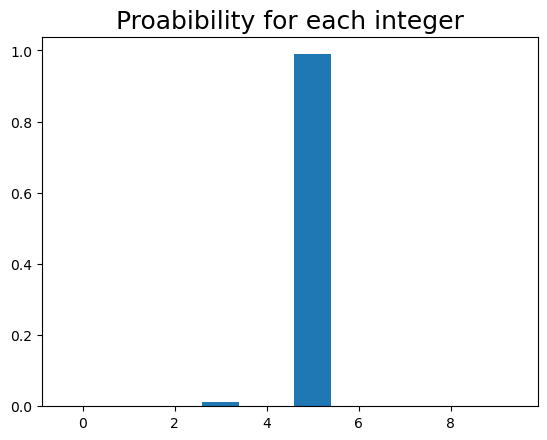

In [10]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()

## Functional APIs

Networks can be built with the Sequential approach by using the ```Sequential()``` constructor, or by using functional API, as shown below. The functional API will give much more flexibility to build more flexible network architectures.

In [28]:
input = tf.keras.layers.Input(shape = (28,28), name = 'Input_Layer')
layer = tf.keras.layers.Flatten()(input)
layer = tf.keras.layers.Dense(128, activation='relu')(layer)
layer = tf.keras.layers.Dropout(0.2)(layer)
layer = tf.keras.layers.Dense(10, activation='softmax')(layer)

model = tf.keras.models.Model(inputs=input, outputs=layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
   9/1875 [..............................] - ETA: 11s - loss: 2.0955 - accuracy: 0.2812 

2023-03-07 10:07:27.785456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1869/1875 [============================>.] - ETA: 0s - loss: 0.2888 - accuracy: 0.9153

2023-03-07 10:07:38.574503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 12s 6ms/step - loss: 0.2884 - accuracy: 0.9154 - val_loss: 0.1377 - val_accuracy: 0.9570
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1366 - accuracy: 0.9591 - val_loss: 0.1005 - val_accuracy: 0.9698
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1019 - accuracy: 0.9686 - val_loss: 0.0901 - val_accuracy: 0.9726
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0820 - accuracy: 0.9753 - val_loss: 0.0987 - val_accuracy: 0.9693
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0675 - accuracy: 0.9788 - val_loss: 0.0735 - val_accuracy: 0.9794
313/313 - 1s - loss: 0.0735 - accuracy: 0.9794 - 1s/epoch - 4ms/step


[0.07350482791662216, 0.9794000387191772]

In [31]:
model.predict(x_train[0][np.newaxis,:])[0]

1/1 [==============================] - 0s 31ms/step


2023-03-07 10:08:30.379115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([2.7174818e-10, 5.5711666e-07, 5.8689801e-07, 1.5039598e-02,
       2.2887707e-15, 9.8495895e-01, 6.7118565e-13, 1.5050239e-07,
       5.4449817e-10, 9.3143164e-08], dtype=float32)

1/1 [==============================] - 0s 18ms/step


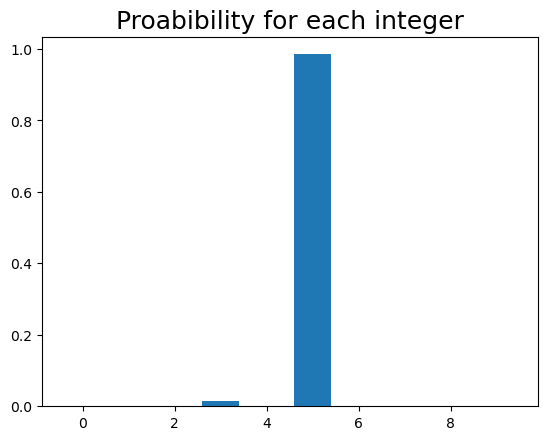

In [32]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()

In [33]:
print(y_train[0])

5


## Custom Training Loop - Advanced (can be skipped)

In [34]:
input = tf.keras.layers.Input(shape = (28,28), name = 'Input_Layer')
layer = tf.keras.layers.Flatten()(input)
layer = tf.keras.layers.Dense(128, activation='relu')(layer)
layer = tf.keras.layers.Dropout(0.2)(layer)
layer = tf.keras.layers.Dense(10, activation='softmax')(layer)

model = tf.keras.models.Model(inputs=input, outputs=layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
batch_size = 32

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
val_dataset = val_dataset.batch(batch_size)

In [42]:
epochs = 5
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))


Start of epoch 0
Training loss (for one batch) at step 0: 1.1993
Seen so far: 32 samples
Training loss (for one batch) at step 200: 1.5797
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 1.0567
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 1.0851
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 1.1792
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 1.3440
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 1.0464
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 1.1176
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.7588
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.8494
Seen so far: 57632 samples

Start of epoch 1
Training loss (for one batch) at step 0: 0.9525
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.8687
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.81

In [43]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4395 - accuracy: 0.8864


[0.43947479128837585, 0.886400043964386]